# AAI project- Analysis of Spotify top streamed songs of 2023

## Members: Hrishikesh Kanade, Atharv Subhekar, Praveena Batta
## Team- 24

## References:


*   Dataset:https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023



# Import and preprocess the data

In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import seaborn.objects as so
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving spotify-2023.csv to spotify-2023 (1).csv


In [ ]:
spotify=pd.read_csv('spotify-2023.csv', encoding='latin-1',header=0)
print(spotify[spotify.isna().any(axis=1)]) # shows NaN values in data frame if it exists
spotify.info()

                                            track_name  \
12                                             Flowers   
14                                           As It Was   
17   What Was I Made For? [From The Motion Picture ...   
22                                    I Wanna Be Yours   
35                                     Los del Espacio   
..                                                 ...   
901                                         After LIKE   
903              B.O.T.A. (Baddest Of Them All) - Edit   
927                I Really Want to Stay at Your House   
938                                          Labyrinth   
940                                      Sweet Nothing   

                                        artist(s)_name  artist_count  \
12                                         Miley Cyrus             1   
14                                        Harry Styles             1   
17                                       Billie Eilish             1   
22             

### Check NA

In [ ]:
spotify.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

### Drop NA

In [ ]:
spotify.dropna(inplace=True)
spotify.isna().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [ ]:
# Assuming 'streams' is the target variable
X = spotify.drop('streams', axis=1)
y = spotify['streams']

In [ ]:
X.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [ ]:
spotify.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [ ]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            817 non-null    object
 1   artist(s)_name        817 non-null    object
 2   artist_count          817 non-null    int64 
 3   released_year         817 non-null    int64 
 4   released_month        817 non-null    int64 
 5   released_day          817 non-null    int64 
 6   in_spotify_playlists  817 non-null    int64 
 7   in_spotify_charts     817 non-null    int64 
 8   streams               817 non-null    object
 9   in_apple_playlists    817 non-null    int64 
 10  in_apple_charts       817 non-null    int64 
 11  in_deezer_playlists   817 non-null    object
 12  in_deezer_charts      817 non-null    int64 
 13  in_shazam_charts      817 non-null    object
 14  bpm                   817 non-null    int64 
 15  key                   817 non-null    ob

In [ ]:
spotify.dropna(inplace=True)

## Data engineering

### Adding additional categorical columns by converting the percentage columns to categorical values in steps of 25%.


*   1 is 0 to 25%
*   2 is 25 to 50%
*   3 is 50 to 75%
*   4 is 75 to 100%







In [ ]:
# Identifying columns with "%" in their name and converting their values to categorical in steps of 25%
percent_columns = [col for col in spotify.columns if '%' in col]

for col in percent_columns:
  # Converting the column to categorical values in steps of 25%
  spotify[col+'cat'] = pd.cut(spotify[col], bins=[0, 25, 50, 75, 100], labels=['1', '2', '3', '4'], include_lowest=True)

# Displaying the modified dataset to verify changes
spotify.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,instrumentalness_%,liveness_%,speechiness_%,danceability_%cat,valence_%cat,energy_%cat,acousticness_%cat,instrumentalness_%cat,liveness_%cat,speechiness_%cat
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,0,8,4,4,4,4,2,1,1,1
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,0,10,4,3,3,3,1,1,1,1
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,0,31,6,3,2,3,1,1,2,1
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,0,11,15,3,3,3,1,1,1,1
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,63,11,6,3,1,4,1,3,1,1


### Create max percentage column to store the highest attribute for each song

In [ ]:

# Checking the columns with "%" in their name and finding the column with the highest value for each row
max_percent_column = spotify[percent_columns].idxmax(axis=1)
spotify['max_percent_column'] = max_percent_column

# Displaying the modified dataset to verify the new column
spotify[['max_percent_column']].head()


,max_percent_column
0,valence_%
1,energy_%
2,energy_%
3,energy_%
4,energy_%


### Numeric mappings for the 'key' column

In [ ]:
# Mapping musical keys to numerical values
key_mapping = {'A': 0, 'A#': 1, 'B': 2, 'C#': 3, 'D': 4, 'D#': 5, 'E': 6, 'F': 7, 'F#': 8, 'G': 9, 'G#': 10}
spotify['key_numeric'] = spotify['key'].map(key_mapping)

In [ ]:
spotify['streams'] = spotify['streams'].replace(',', '', regex=True)

In [ ]:
spotify.drop(spotify.index[478], inplace=True)

### Create percentile column for number of times a song was streamed.

In [ ]:
# Creating categories for the 'streams' column as an ordinal variable based on percentile scores
spotify['streams'] = pd.to_numeric(spotify['streams'])

# Calculate the percentiles for categorization
percentiles = [0, 25, 50, 75, 100]
percentile_values = [spotify['streams'].quantile(p/100) for p in percentiles]

# Creating labels for the percentile categories
percentile_labels = ['Less streamed', 'Medium streamed', 'Highly streamed', 'Highest streamed']
# Categorizing 'streams' based on percentile scores
spotify['streams_percentile_category'] = pd.cut(spotify['streams'], bins=percentile_values, labels=percentile_labels, include_lowest=True)

# Displaying the modified dataset to verify the new column
spotify[['streams', 'streams_percentile_category']].head()


,streams,streams_percentile_category
0,141381703,Medium streamed
1,133716286,Less streamed
2,140003974,Medium streamed
3,800840817,Highest streamed
4,303236322,Highly streamed


### Create percentile column for number of times a song appears in Spotify playlist

In [ ]:
# Creating categories for the 'streams' column as an ordinal variable based on percentile scores
spotify['in_spotify_playlists'] = pd.to_numeric(spotify['in_spotify_playlists'])

# Calculate the percentiles for categorization
percentiles = [0, 25, 50, 75, 100]
percentile_values = [spotify['in_spotify_playlists'].quantile(p/100) for p in percentiles]

# Creating labels for the percentile categories
percentile_labels = [1, 2, 3, 4]
# Categorizing 'streams' based on percentile scores
spotify['spotify_pl_percentile_cat'] = pd.cut(spotify['in_spotify_playlists'], bins=percentile_values, labels=percentile_labels, include_lowest=True)

# Displaying the modified dataset to verify the new column
spotify[['in_spotify_playlists', 'spotify_pl_percentile_cat']].head()

,in_spotify_playlists,spotify_pl_percentile_cat
0,553,1
1,1474,2
2,1397,2
3,7858,4
4,3133,3


### Add numeric mappings for categorical columns.

In [ ]:
key_mapping = {
        'A': 0,
        'A#': 1,
        'B': 2,
        'C#': 3,
        'D': 4,
        'D#': 5,
        'E': 6,
        'F': 7,
        'F#': 8,
        'G': 9,
        'G#': 10
    }

mode_mapping = {
    'Major': 1,
    'Minor': 2}

spotify['key'] = spotify['key'].map(key_mapping)
spotify['mode'] = spotify['mode'].map(mode_mapping)

print("keys:",spotify['key'].unique())
print("mode:",spotify['mode'].unique())

keys: [ 2  3  7  0  4  8 10  9  6  1  5]
mode: [1 2]


In [ ]:
print("keys:",spotify['key'].unique())
print("mode:",spotify['mode'].unique())
print("number of unique artists:",len(spotify['artist(s)_name'].unique()))
print("#######")
print(spotify.isnull().sum())

keys: ['B' 'C#' 'F' 'A' 'D' 'F#' 'G#' 'G' 'E' 'A#' 'D#']
mode: ['Major' 'Minor']
number of unique artists: 570
#######
track_name                     0
artist(s)_name                 0
artist_count                   0
released_year                  0
released_month                 0
released_day                   0
in_spotify_playlists           0
in_spotify_charts              0
streams                        0
in_apple_playlists             0
in_apple_charts                0
in_deezer_playlists            0
in_deezer_charts               0
in_shazam_charts               0
bpm                            0
key                            0
mode                           0
danceability_%                 0
valence_%                      0
energy_%                       0
acousticness_%                 0
instrumentalness_%             0
liveness_%                     0
speechiness_%                  0
danceability_%cat              0
valence_%cat                   0
energy_%cat            

### Sort the data by number of streams

In [ ]:
spotify_sorted = spotify.sort_values(by='streams', ascending=False)

# Exploratory Data Analysis

## Plot of Count vs Year of release with category of amount streamed for all songs

In [ ]:
sns.set(rc={'figure.figsize':(27,10)})

<Axes: xlabel='released_year', ylabel='Count'>

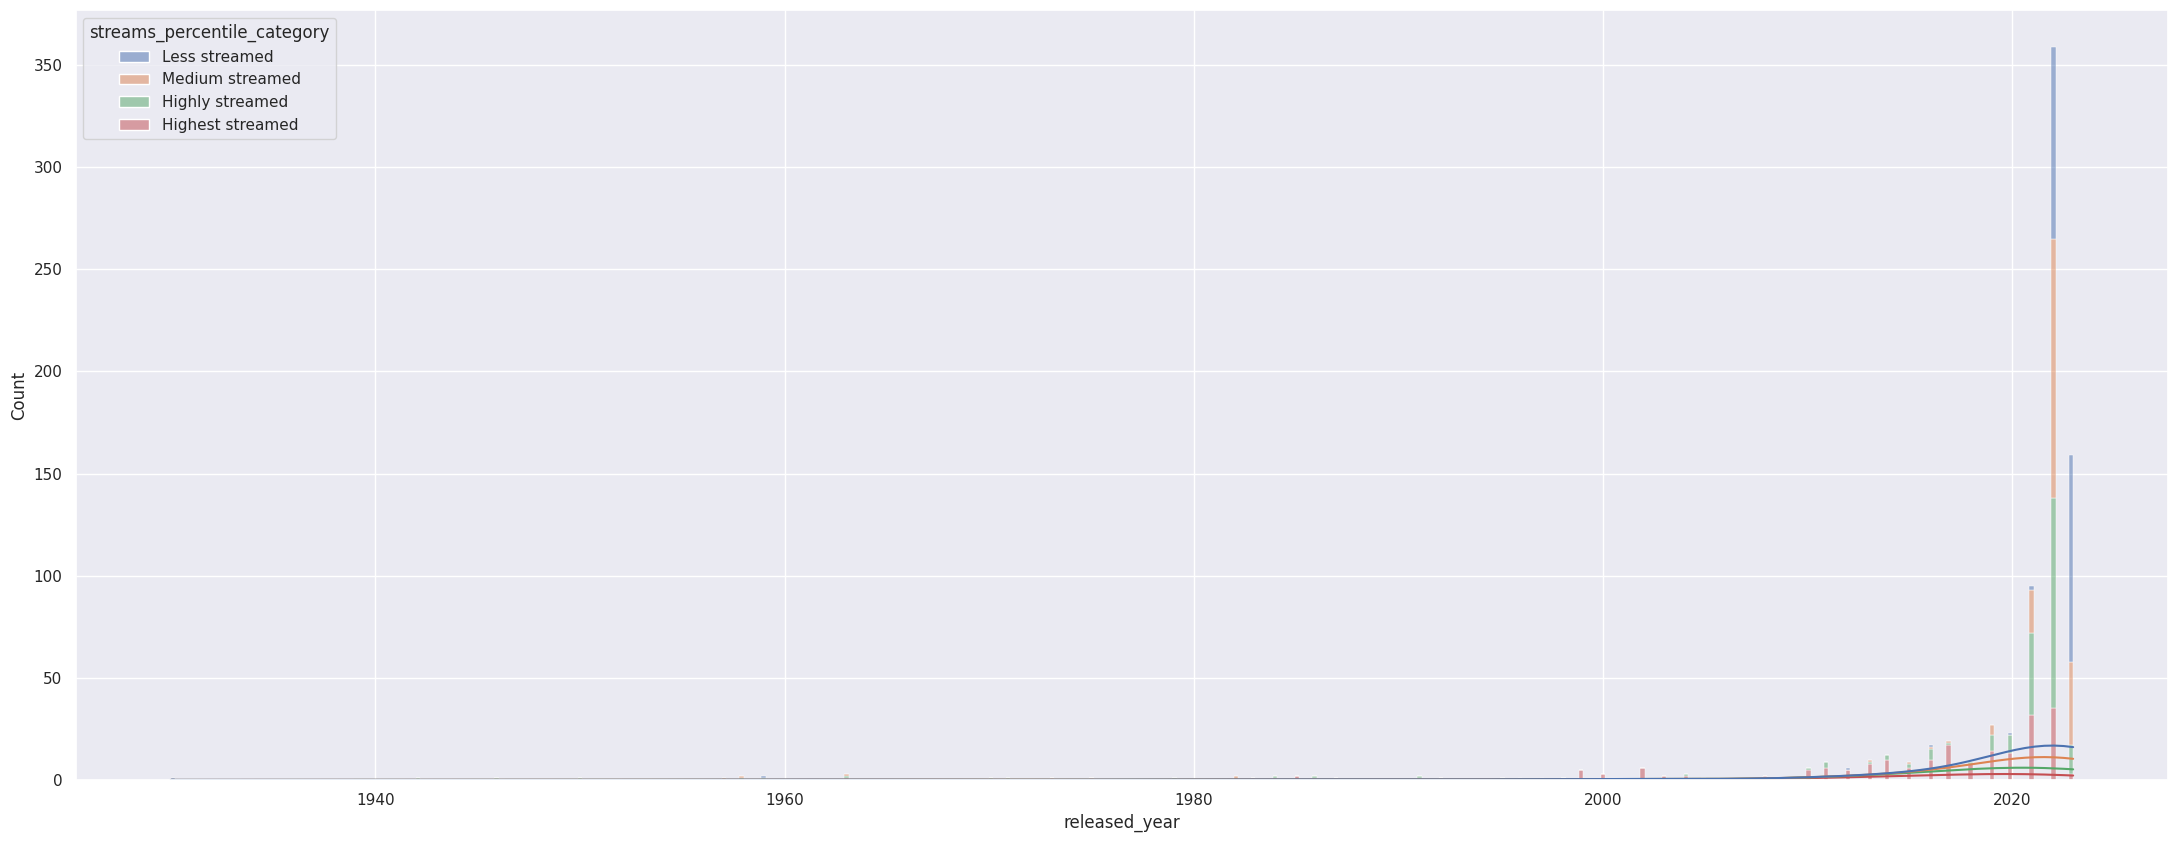

In [ ]:
sns.histplot(data=spotify, x="released_year",hue='streams_percentile_category',multiple="stack", kde=True)

## Plot of Count vs Year of release with category of amount streamed for top 200 songs

<Axes: xlabel='released_year', ylabel='Count'>

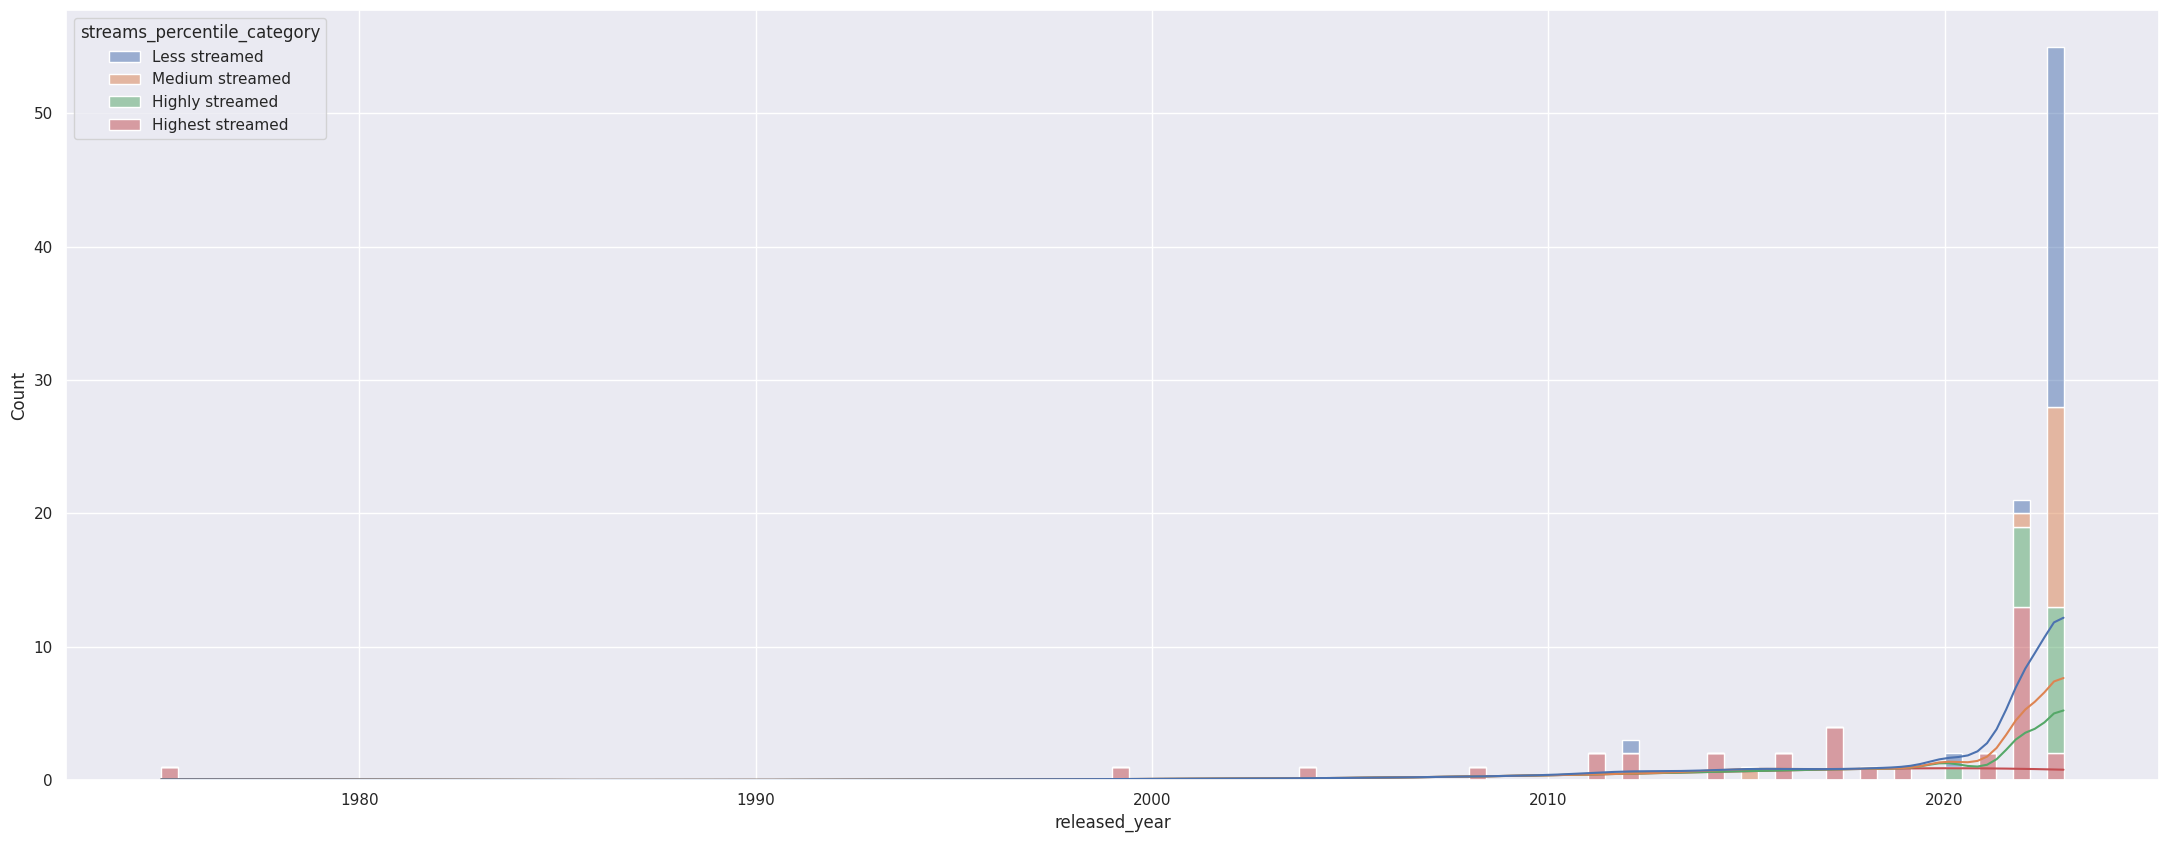

In [ ]:
sns.histplot(data=spotify.head(100), x="released_year",hue='streams_percentile_category',multiple="stack", kde=True)

## Plot of the highest valued attributes vs Count

<Axes: xlabel='max_percent_column', ylabel='Count'>

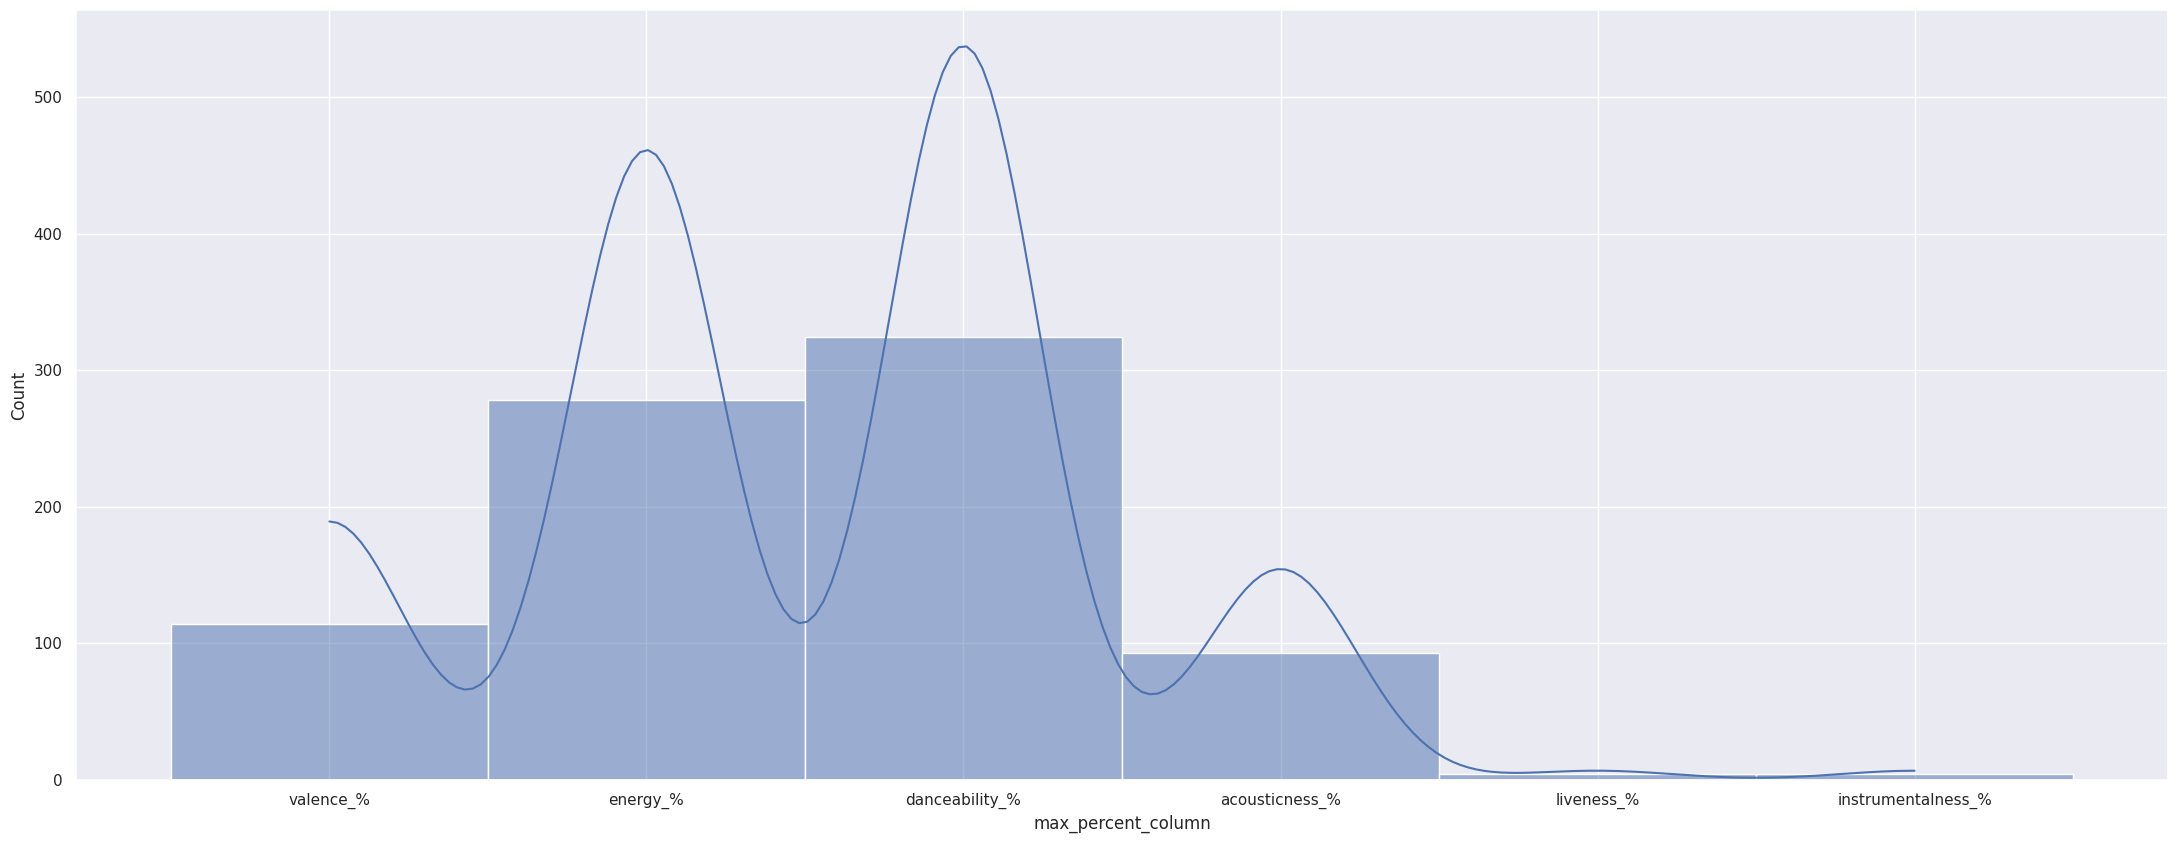

In [ ]:
sns.histplot(data=spotify, x="max_percent_column",kde=True)

## Discussion:
Energy and Danceability seem to have the highest effect on the popularity of a song


---



---



## Plot of a release year vs count with attributes as the hue for top 400 songs

<Axes: xlabel='released_year', ylabel='Count'>

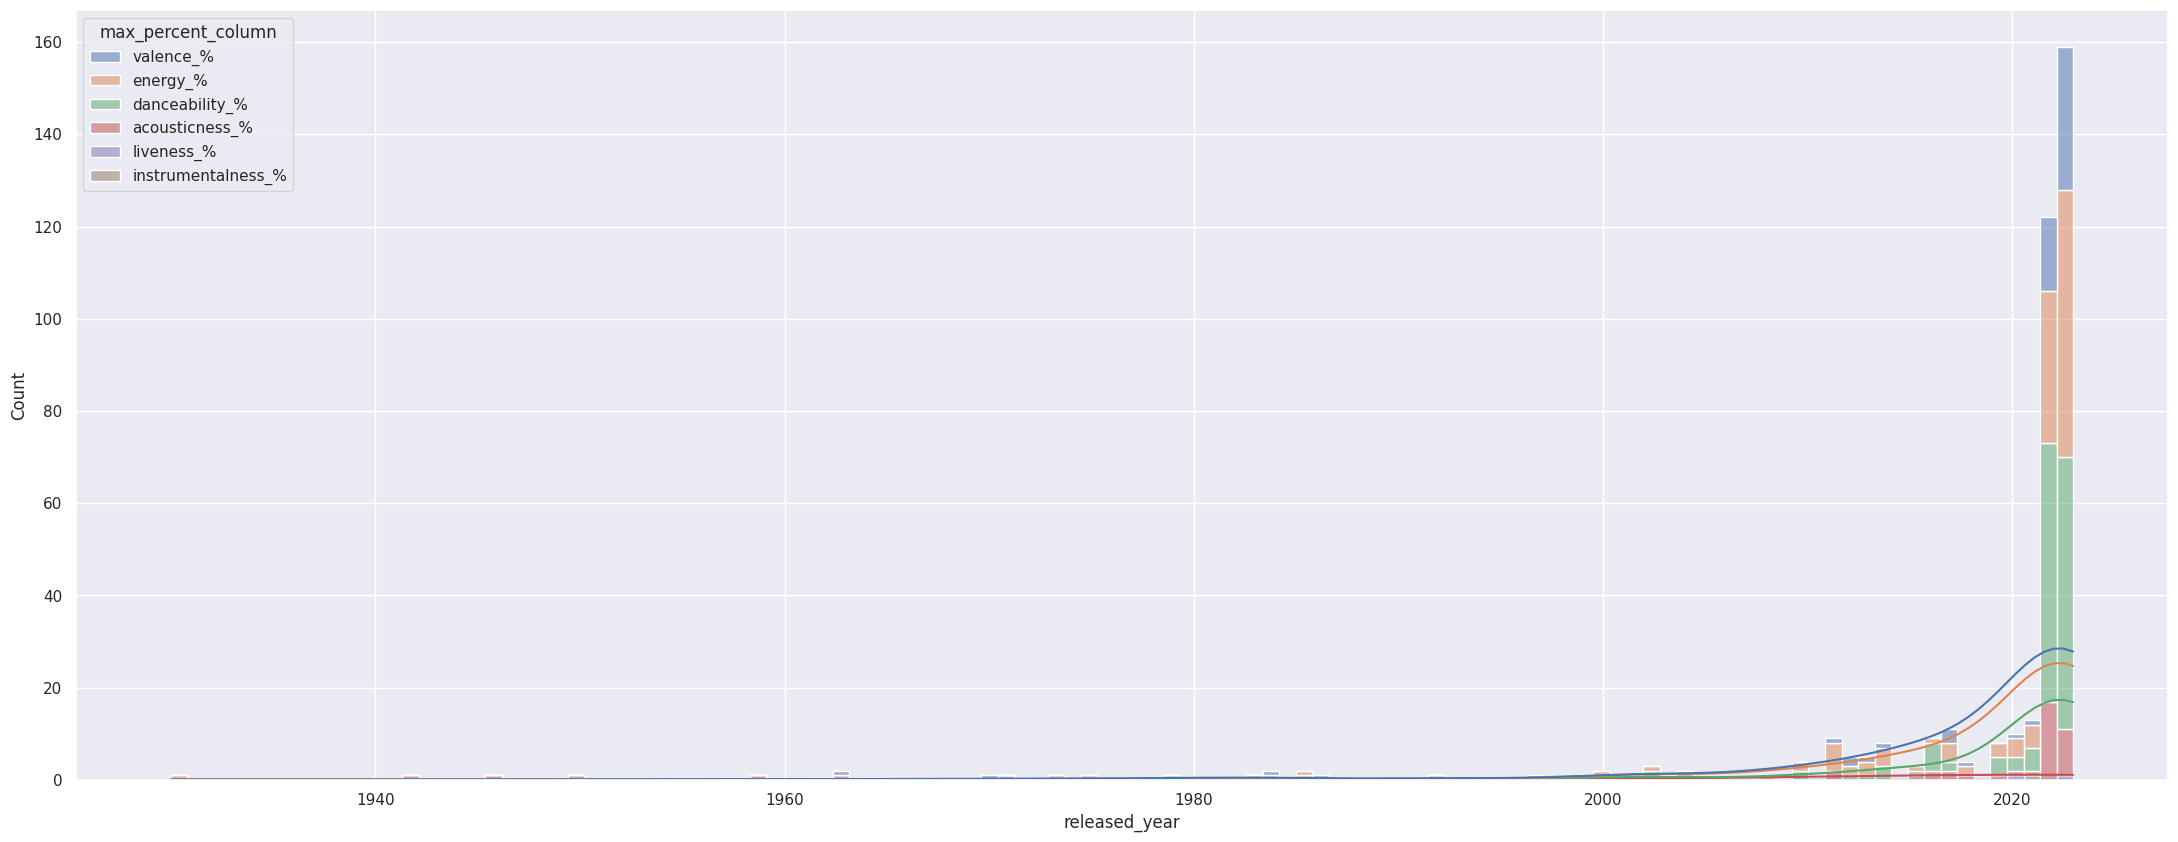

In [ ]:
sns.histplot(data=spotify.head(400), x="released_year",hue='max_percent_column',multiple="stack", kde=True)

## Discussion
 Danceability and energy have the highest count suggesting that songs with high danceability and energy are more likely to be highly streamed.


---



---



## Plot of a release year vs count with key as the hue for top 400 songs

<Axes: xlabel='released_year', ylabel='Count'>

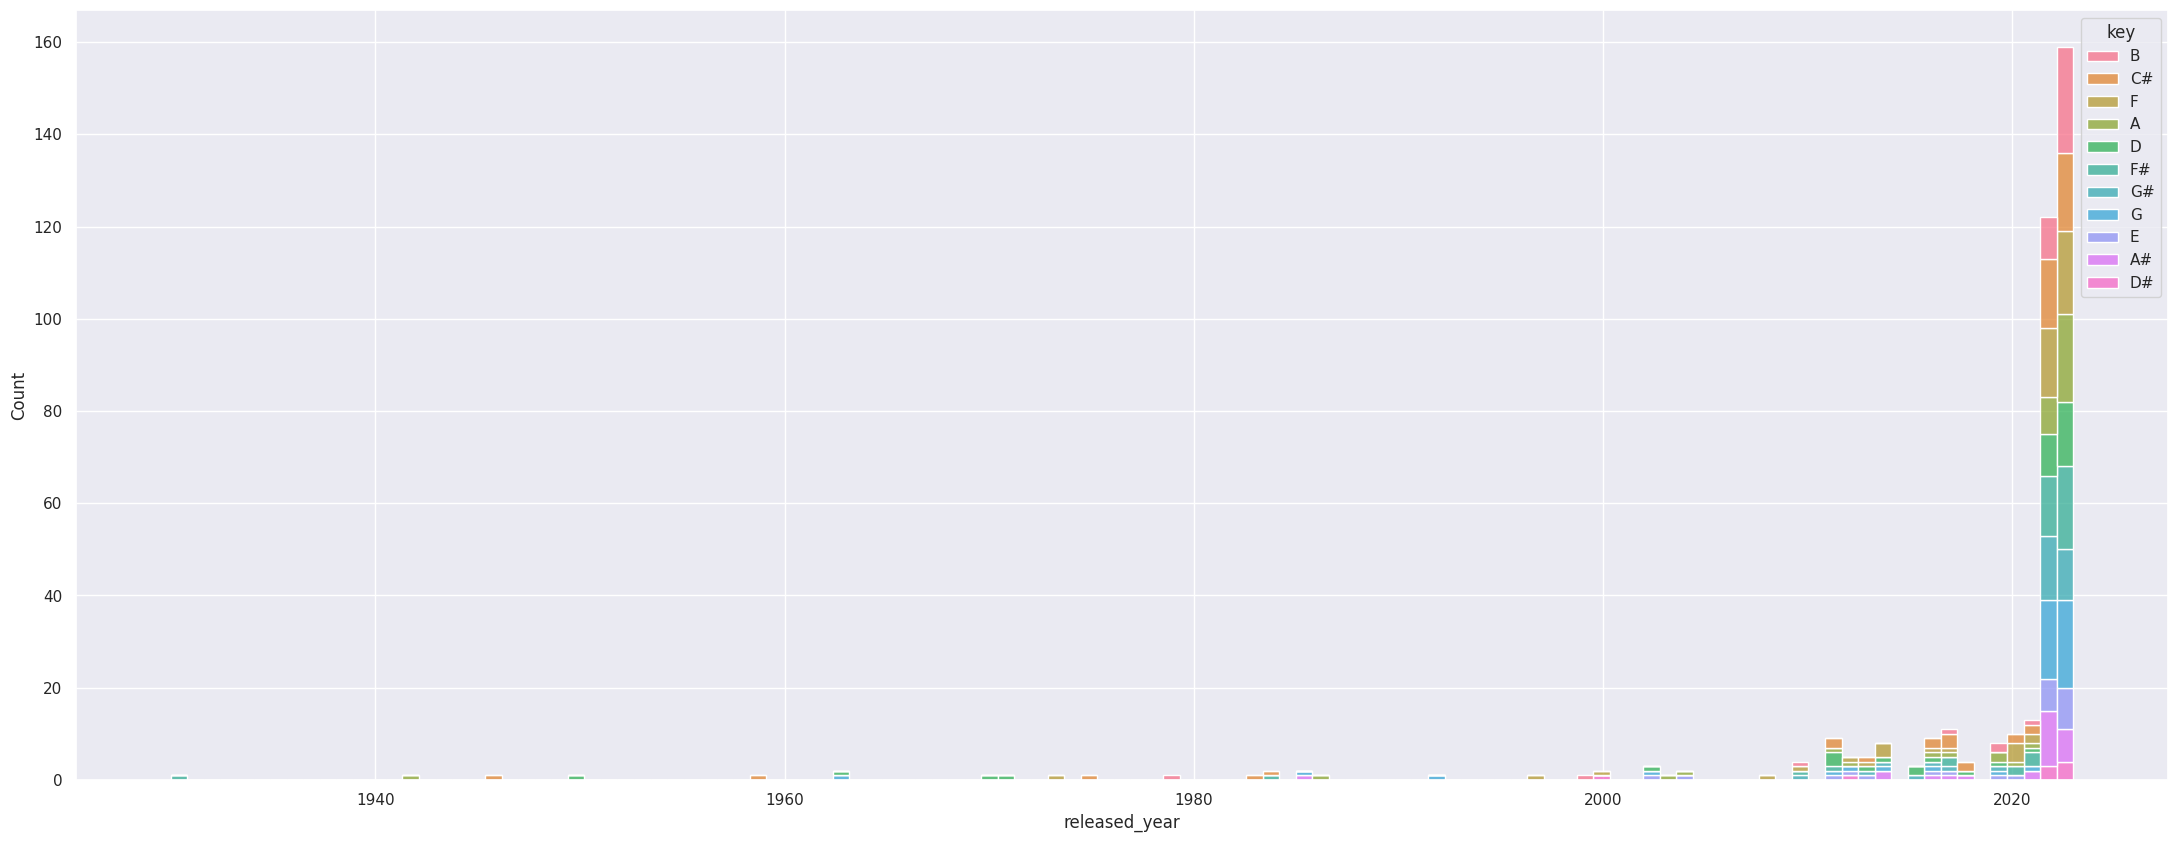

In [ ]:
sns.histplot(data=spotify.head(400), x="released_year",hue='key',multiple="stack")



---

## Plot of Key vs count with popularity as hue for all songs

<Axes: xlabel='key', ylabel='Count'>

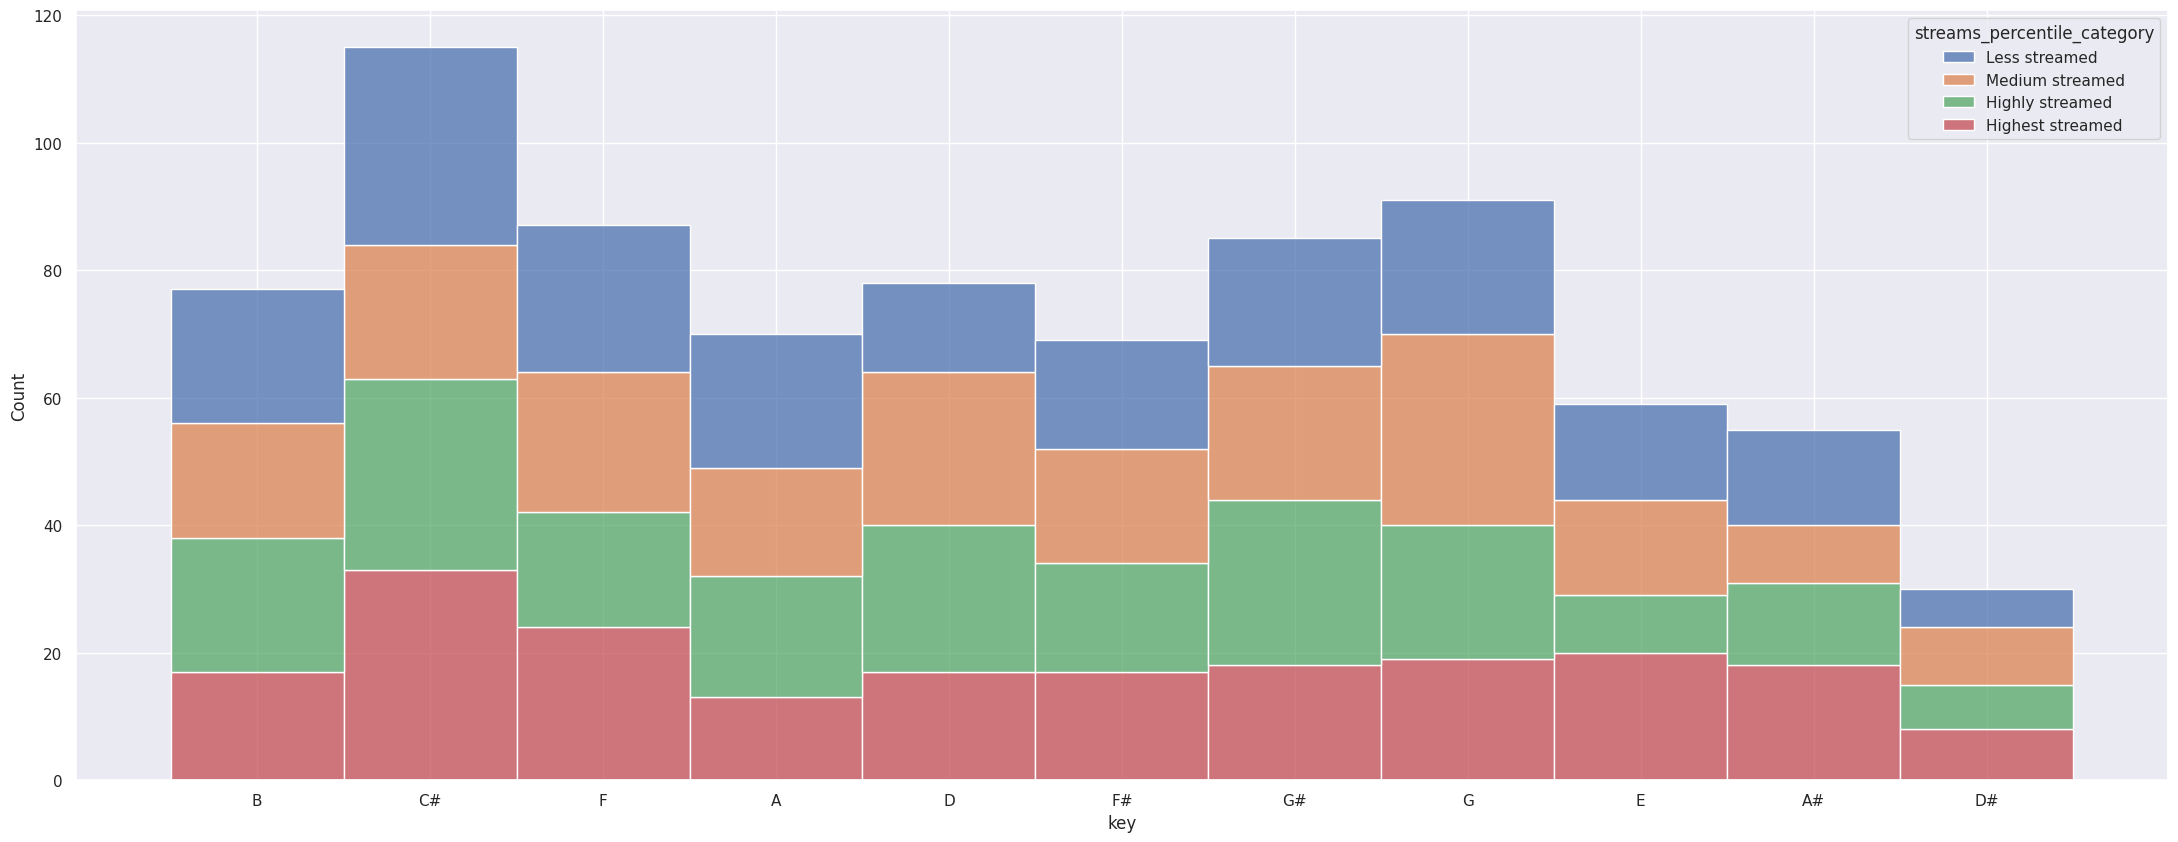

In [ ]:
sns.histplot(data=spotify, x="key",hue='streams_percentile_category',multiple="stack")

## Discussion
 C# appears to be the most popular key.

## Pairplot and correlation analysis

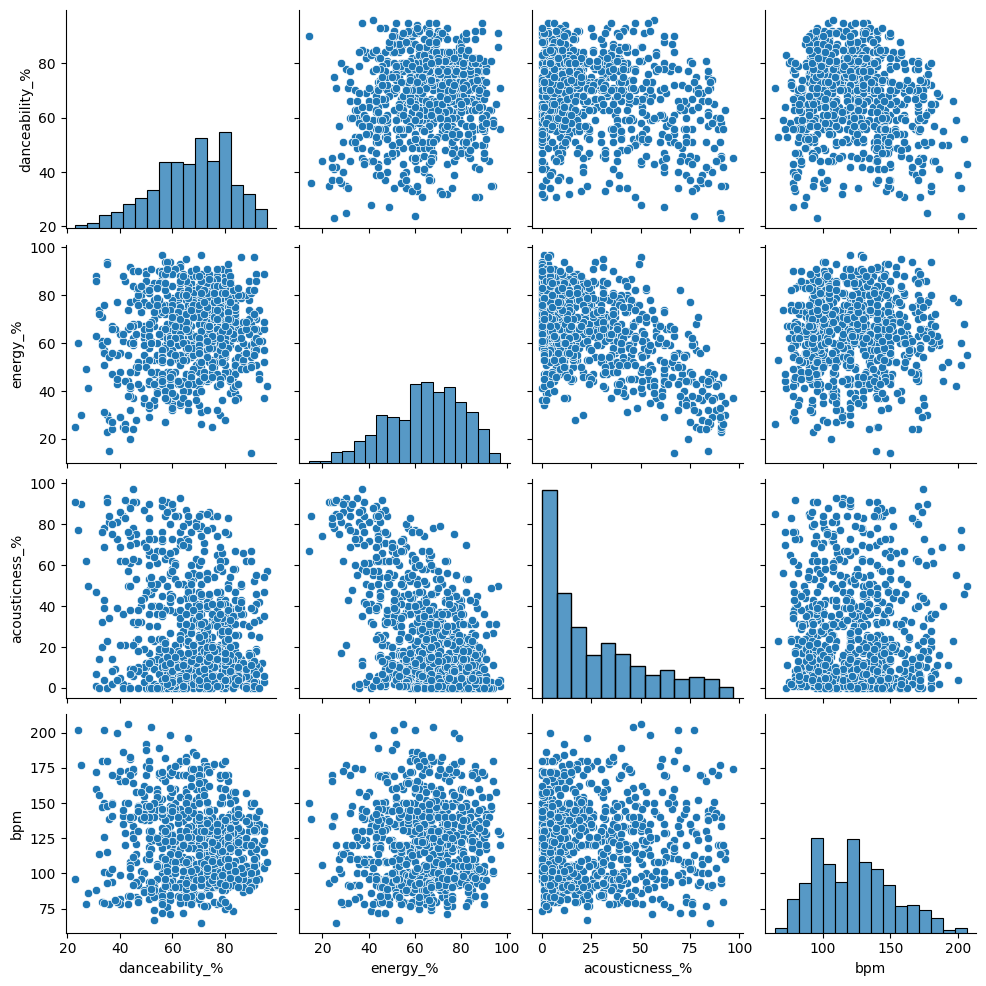

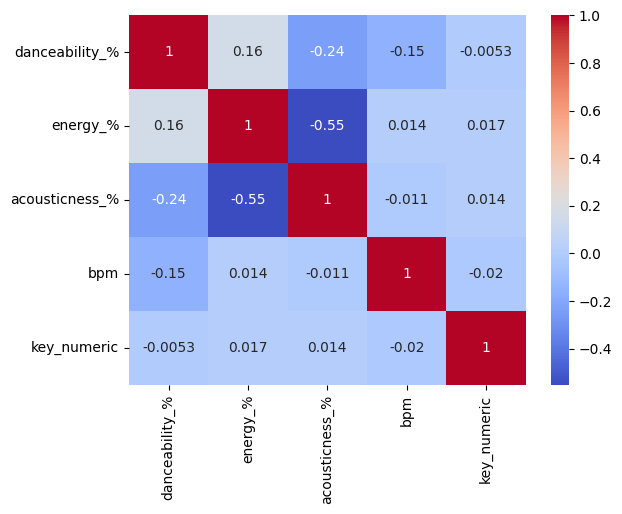

In [ ]:
# Analysis
# Pairplot Analysis
numerical_columns = ['danceability_%', 'energy_%', 'acousticness_%', 'bpm']
sns.pairplot(spotify[numerical_columns])
plt.show()

# Correlation Analysis
correlation_matrix = spotify[numerical_columns + ['key_numeric']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Example feature columns
numerical_cols = [
    'artist_count', 'released_year', 'released_month', 'released_day',
    'in_spotify_playlists', 'in_spotify_charts',
    'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
    'in_deezer_charts', 'in_shazam_charts', 'bpm',
    'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
    'instrumentalness_%', 'liveness_%', 'speechiness_%'
]

categorical_cols = ['key', 'mode']


# Model training and analysis

## Feature importances when predicting streams with random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
features=['bpm','danceability_%', 'valence_%', 'energy_%', 'acousticness_%','instrumentalness_%', 'liveness_%', 'speechiness_%', 'key_numeric','mode','in_spotify_playlists', 'in_spotify_charts','in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists','in_deezer_charts', 'in_shazam_charts']
# Create a StandardScaler object
scaler = StandardScaler()
X_rf= spotify[features]
X_rf = X_rf.replace(',', '', regex=True).astype(float)
X_rf=X_rf.dropna()
#X_rf=scaler.fit_transform(X_rf)
y_rf = spotify['streams_percentile_category']
attr_train, attr_test, target_train, target_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=5)

model = RandomForestClassifier(n_estimators=100,random_state=8)
model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

### Accuracy and other metrics

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(f"Accuracy= {accuracy_score(target_test,target_pred)}")

print(confusion_matrix(target_test,target_pred))
print(classification_report(target_test,target_pred))

Accuracy= 0.7012195121951219
[[33  7  3  1]
 [ 9 31  2  6]
 [ 0  1 29  1]
 [ 0  8 11 22]]
                  precision    recall  f1-score   support

Highest streamed       0.79      0.75      0.77        44
 Highly streamed       0.66      0.65      0.65        48
   Less streamed       0.64      0.94      0.76        31
 Medium streamed       0.73      0.54      0.62        41

        accuracy                           0.70       164
       macro avg       0.71      0.72      0.70       164
    weighted avg       0.71      0.70      0.70       164



In [ ]:
# Feature importance for Mean Decrease Accuracy
mean_decrease_accuracy = model.feature_importances_
print(f"Mean Decrease Accuracy{ mean_decrease_accuracy}")
# # Feature importance for Mean Decrease GINI
# # Note: GINI importance is specific to decision trees and random forests
gini_importance = model.feature_importances_ * model.estimators_[0].tree_.impurity[0]
print(f"\nMean Decrease GINI= {gini_importance}")

Mean Decrease Accuracy[0.04858002 0.04969508 0.05587113 0.04777728 0.04841525 0.00728506
 0.0449071  0.03711749 0.03295632 0.00836652 0.2219442  0.04641235
 0.10322653 0.05379786 0.12934083 0.01705888 0.0472481 ]

Mean Decrease GINI= [0.03631548 0.03714903 0.04176587 0.0357154  0.03619231 0.00544587
 0.03356983 0.02774679 0.02463615 0.0062543  0.16591204 0.03469506
 0.0771659  0.04021602 0.09668737 0.01275218 0.03531982]


### Plots of feature importances

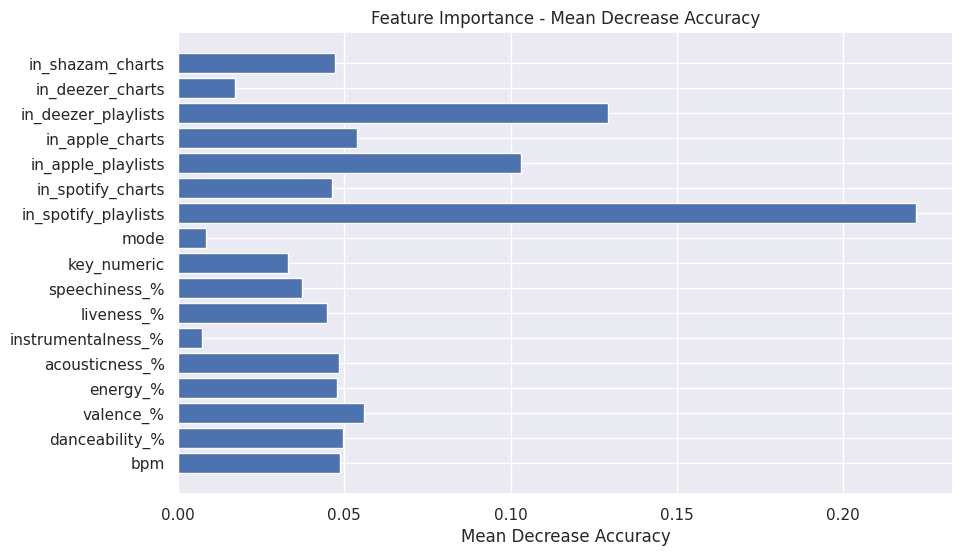

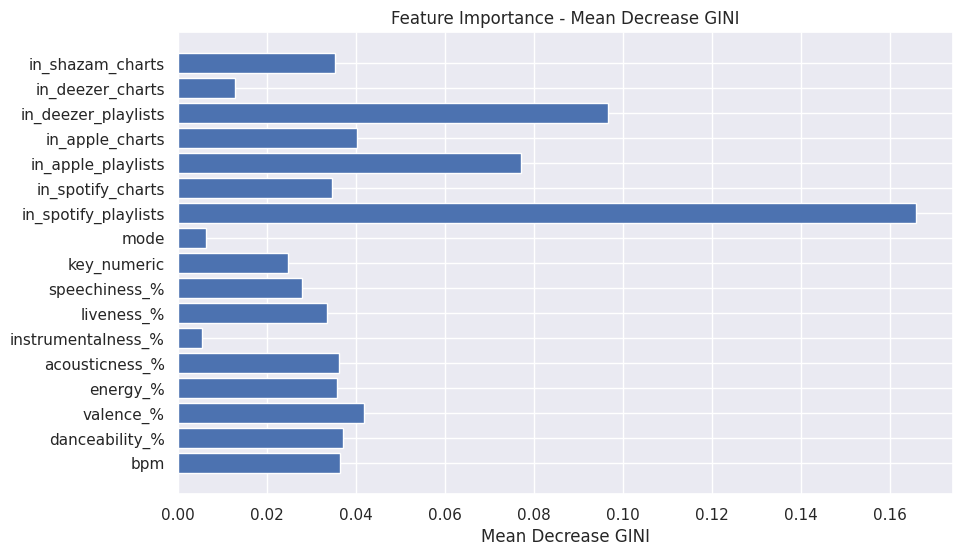

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(mean_decrease_accuracy)), mean_decrease_accuracy, align='center')
plt.yticks(range(len(mean_decrease_accuracy)), features)
plt.xlabel('Mean Decrease Accuracy')
plt.title('Feature Importance - Mean Decrease Accuracy')
plt.show()
plt.figure(figsize=(10, 6))
plt.barh(range(len(gini_importance)), gini_importance, align='center')
plt.yticks(range(len(gini_importance)), features)
plt.xlabel('Mean Decrease GINI')
plt.title('Feature Importance - Mean Decrease GINI')
plt.show()

In [ ]:
feature_scores = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)

print(feature_scores)

in_spotify_playlists    0.221944
in_deezer_playlists     0.129341
in_apple_playlists      0.103227
valence_%               0.055871
in_apple_charts         0.053798
danceability_%          0.049695
bpm                     0.048580
acousticness_%          0.048415
energy_%                0.047777
in_shazam_charts        0.047248
in_spotify_charts       0.046412
liveness_%              0.044907
speechiness_%           0.037117
key_numeric             0.032956
in_deezer_charts        0.017059
mode                    0.008367
instrumentalness_%      0.007285
dtype: float64


## Discussion:


*   The accuracy is close to 70%. And 'in_spotify_playlists' is the most important feature.



# Decision Tree CART for predicting the category of how much the song will be streamed.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',splitter='best',max_leaf_nodes=5)

model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(f"\n Accuracy: {accuracy_score(target_test,target_pred)}  ")
print(f"\n Confusion Matrix:")
print(confusion_matrix(target_test,target_pred))
print(f"\n Classification Report:")
print(classification_report(target_test,target_pred))


 Accuracy: 0.524390243902439  

 Confusion Matrix:
[[22 20  2  0]
 [ 5 35  8  0]
 [ 0  2 29  0]
 [ 0 16 25  0]]

 Classification Report:
                  precision    recall  f1-score   support

Highest streamed       0.81      0.50      0.62        44
 Highly streamed       0.48      0.73      0.58        48
   Less streamed       0.45      0.94      0.61        31
 Medium streamed       0.00      0.00      0.00        41

        accuracy                           0.52       164
       macro avg       0.44      0.54      0.45       164
    weighted avg       0.44      0.52      0.45       164



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Using grid search to find best number of 'max_leaf_nodes'

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import  cross_val_score

def run_gridsearch(X, y, clf, param_grid, cv=5):
    grid_search = GridSearchCV(clf,
                               param_grid=param_grid,
                               cv=cv)
    #start = time()
    grid_search.fit(X, y)

    return  grid_search
parameters={"max_leaf_nodes":[None,2,3,4,5,6,7,8,9]}
grid_search = run_gridsearch(attr_train,target_train,model,param_grid=parameters,cv=10)
print("Best parameter=",grid_search.best_params_)

gridCV_results=grid_search.cv_results_

Best parameter= {'max_leaf_nodes': 7}


### Accuracy and other metrics

In [ ]:
model = DecisionTreeClassifier(criterion='entropy',splitter='best',max_leaf_nodes=7)

model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(f"\n Accuracy: {accuracy_score(target_test,target_pred)}  ")
print(f"\n Confusion Matrix:")
print(confusion_matrix(target_test,target_pred))
print(f"\n Classification Report:")
print(classification_report(target_test,target_pred))


 Accuracy: 0.5365853658536586  

 Confusion Matrix:
[[22 20  2  0]
 [ 5 30  7  6]
 [ 0  0 28  3]
 [ 0  8 25  8]]

 Classification Report:
                  precision    recall  f1-score   support

Highest streamed       0.81      0.50      0.62        44
 Highly streamed       0.52      0.62      0.57        48
   Less streamed       0.45      0.90      0.60        31
 Medium streamed       0.47      0.20      0.28        41

        accuracy                           0.54       164
       macro avg       0.56      0.56      0.52       164
    weighted avg       0.57      0.54      0.51       164



## Decision tree for predicting number of playlists the song will be in. (based on entropy)

In [ ]:
features=['streams','bpm','danceability_%', 'valence_%', 'energy_%', 'acousticness_%','instrumentalness_%', 'liveness_%', 'speechiness_%', 'key_numeric','mode', 'in_spotify_charts','in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists','in_deezer_charts', 'in_shazam_charts']
# Create a StandardScaler object
scaler = StandardScaler()
X_rf= spotify[features]
X_rf = X_rf.replace(',', '', regex=True).astype(float)
X_rf=X_rf.dropna()
#X_rf=scaler.fit_transform(X_rf)
y_rf = spotify['spotify_pl_percentile_cat']
attr_train, attr_test, target_train, target_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=5)

### Run grid search to get best max_depth

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import  cross_val_score

def run_gridsearch(X, y, clf, param_grid, cv=5):
    grid_search = GridSearchCV(clf,
                               param_grid=param_grid,
                               cv=cv)
    #start = time()
    grid_search.fit(X, y)

    return  grid_search
parameters={"max_depth":[None,2,3,4,5,6,7,8,9]}
grid_search = run_gridsearch(attr_train,target_train,model,param_grid=parameters,cv=10)
print("Best parameter=",grid_search.best_params_)

gridCV_results=grid_search.cv_results_

Best parameter= {'max_depth': 6}


### Accuracy and other metrics

In [ ]:
model = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=6)

model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(f"\n Accuracy: {accuracy_score(target_test,target_pred)}  ")
print(f"\n Confusion Matrix:")
print(confusion_matrix(target_test,target_pred))
print(f"\n Classification Report:")
print(classification_report(target_test,target_pred))


 Accuracy: 0.6463414634146342  

 Confusion Matrix:
[[23 13  0  0]
 [ 7 27  3  1]
 [ 1 13 29  4]
 [ 0  0 16 27]]

 Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.64      0.69        36
           2       0.51      0.71      0.59        38
           3       0.60      0.62      0.61        47
           4       0.84      0.63      0.72        43

    accuracy                           0.65       164
   macro avg       0.67      0.65      0.65       164
weighted avg       0.68      0.65      0.65       164



### Visualize the decision tree

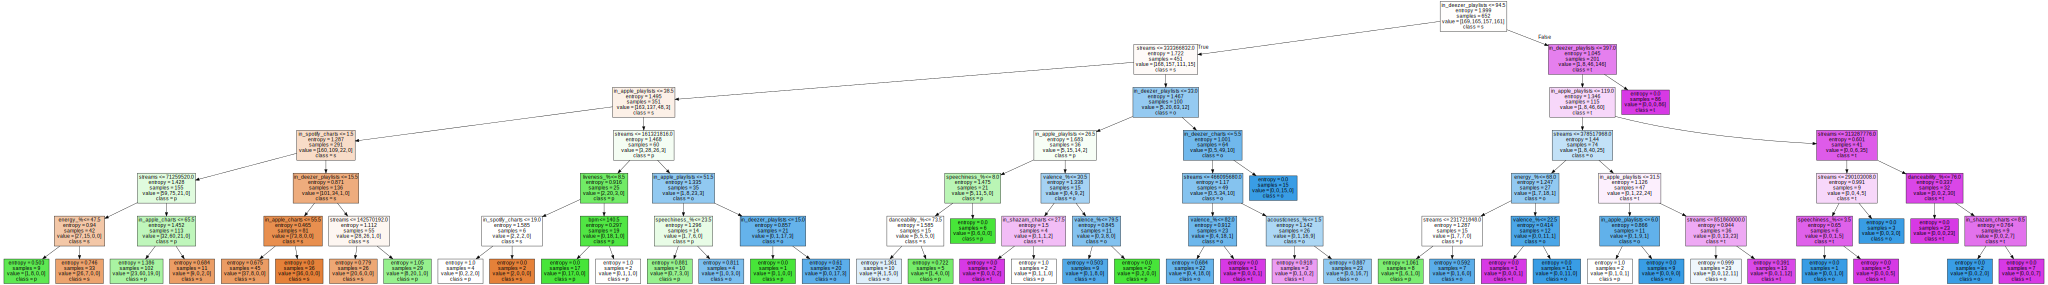

In [ ]:
import graphviz
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=features,
                                class_names='spotify_pl_percentile_cat',
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

## Decision tree to classify number of Spotify playlists based on Gini impurity

Best parameter= {'max_depth': 4}

 Accuracy: 0.6829268292682927  

 Confusion Matrix:
[[26 10  0  0]
 [11 25  2  0]
 [ 1 14 26  6]
 [ 0  1  7 35]]

 Classification Report:
              precision    recall  f1-score   support

           1       0.68      0.72      0.70        36
           2       0.50      0.66      0.57        38
           3       0.74      0.55      0.63        47
           4       0.85      0.81      0.83        43

    accuracy                           0.68       164
   macro avg       0.70      0.69      0.68       164
weighted avg       0.70      0.68      0.69       164



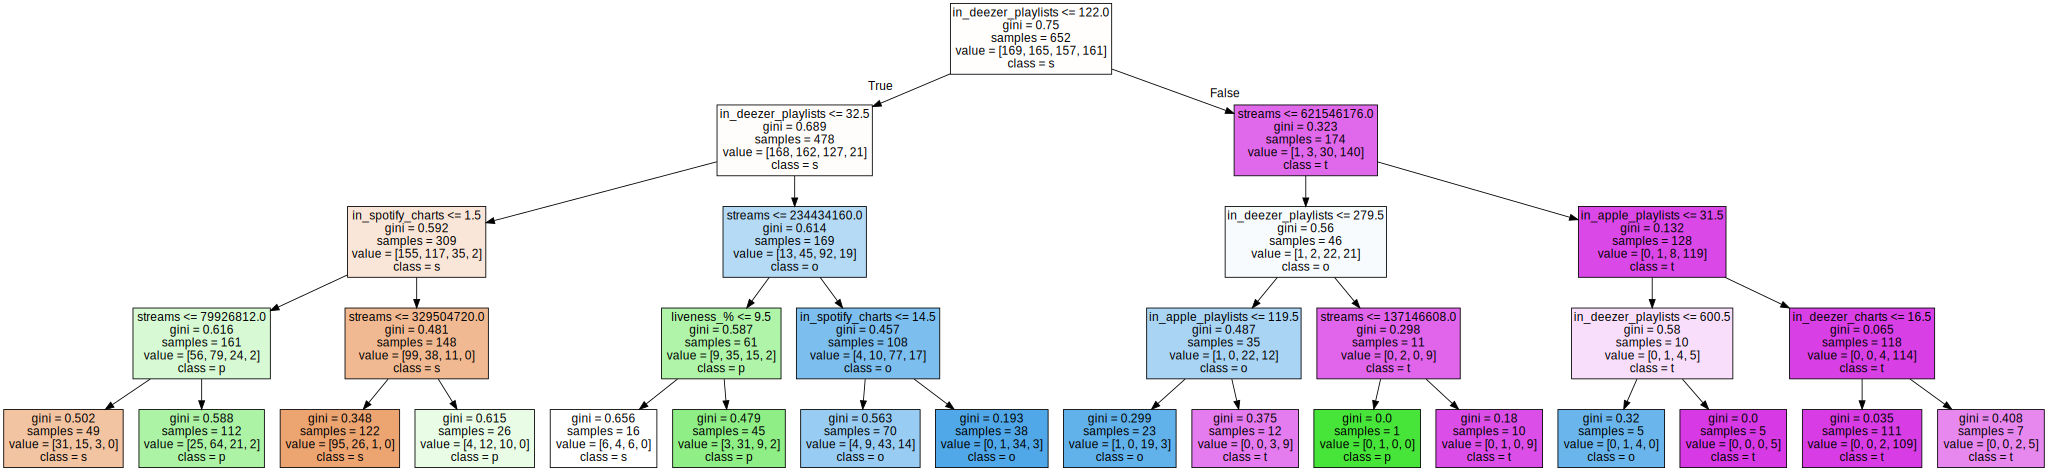

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import  cross_val_score

def run_gridsearch(X, y, clf, param_grid, cv=5):
    grid_search = GridSearchCV(clf,
                               param_grid=param_grid,
                               cv=cv)
    #start = time()
    grid_search.fit(X, y)

    return  grid_search
parameters={"max_depth":[None,2,3,4,5,6,7,8,9]}
grid_search = run_gridsearch(attr_train,target_train,model,param_grid=parameters,cv=10)
print("Best parameter=",grid_search.best_params_)

gridCV_results=grid_search.cv_results_

model = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=grid_search.best_params_['max_depth'])

model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(f"\n Accuracy: {accuracy_score(target_test,target_pred)}  ")
print(f"\n Confusion Matrix:")
print(confusion_matrix(target_test,target_pred))
print(f"\n Classification Report:")
print(classification_report(target_test,target_pred))

import graphviz
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=features,
                                class_names='spotify_pl_percentile_cat',
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

## Random forest for classifying number of Spotify playlists a song will be in.

In [ ]:
model = RandomForestClassifier(n_estimators=100,random_state=8)
model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(f"Accuracy= {accuracy_score(target_test,target_pred)}")

print(confusion_matrix(target_test,target_pred))
print(classification_report(target_test,target_pred))

# Feature importance for Mean Decrease Accuracy
mean_decrease_accuracy = model.feature_importances_
print(f"Mean Decrease Accuracy{ mean_decrease_accuracy}")
# # Feature importance for Mean Decrease GINI
# # Note: GINI importance is specific to decision trees and random forests
gini_importance = model.feature_importances_ * model.estimators_[0].tree_.impurity[0]
print(f"\nMean Decrease GINI= {gini_importance}")

Accuracy= 0.7134146341463414
[[27  9  0  0]
 [12 25  1  0]
 [ 1 10 28  8]
 [ 0  0  6 37]]
              precision    recall  f1-score   support

           1       0.68      0.75      0.71        36
           2       0.57      0.66      0.61        38
           3       0.80      0.60      0.68        47
           4       0.82      0.86      0.84        43

    accuracy                           0.71       164
   macro avg       0.72      0.72      0.71       164
weighted avg       0.72      0.71      0.71       164

Mean Decrease Accuracy[0.20229608 0.03873631 0.04020245 0.04391776 0.04324174 0.03912968
 0.00635006 0.03530526 0.03951225 0.02714037 0.00772901 0.03945609
 0.13964031 0.0576152  0.19032169 0.01592567 0.03348006]

Mean Decrease GINI= [0.15167352 0.02904294 0.03014219 0.03292778 0.03242093 0.02933787
 0.00476102 0.02647048 0.02962471 0.02034876 0.0057949  0.0295826
 0.10469673 0.04319758 0.1426956  0.01194043 0.02510201]


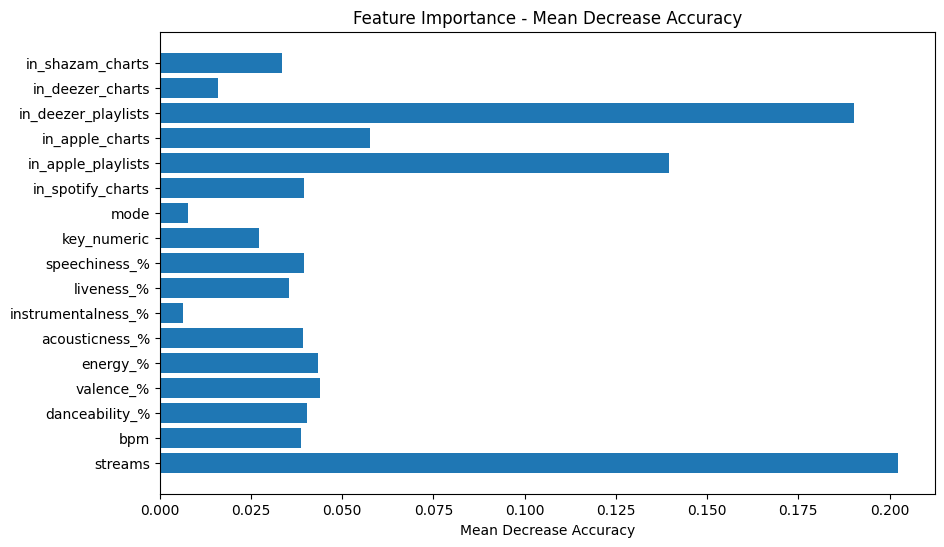

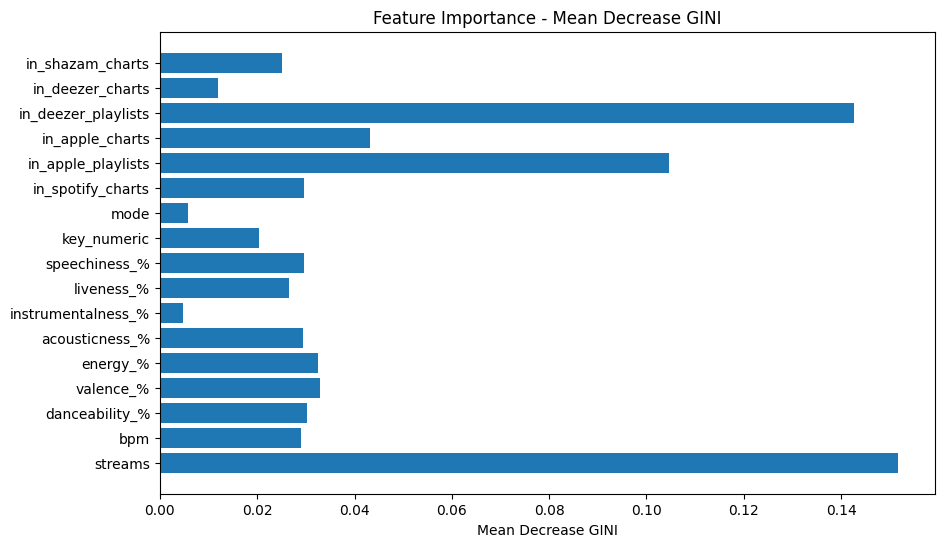

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(mean_decrease_accuracy)), mean_decrease_accuracy, align='center')
plt.yticks(range(len(mean_decrease_accuracy)), features)
plt.xlabel('Mean Decrease Accuracy')
plt.title('Feature Importance - Mean Decrease Accuracy')
plt.show()
plt.figure(figsize=(10, 6))
plt.barh(range(len(gini_importance)), gini_importance, align='center')
plt.yticks(range(len(gini_importance)), features)
plt.xlabel('Mean Decrease GINI')
plt.title('Feature Importance - Mean Decrease GINI')
plt.show()

### Discussion: Accuracy of random forest when predicting the category of number of playlists a song will appear in is 71% and 'streams' and 'in_deezer playlists' are the most important features

# MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(128,12),random_state=1, max_iter=300).fit(attr_train, target_train)

In [ ]:
target_pred = model.predict(attr_test)

In [ ]:
print(f"\n Accuracy: {accuracy_score(target_test,target_pred)}  ")
print(f"\n Confusion Matrix:")
print(confusion_matrix(target_test,target_pred))
print(f"\n Classification Report:")
print(classification_report(target_test,target_pred))


 Accuracy: 0.21951219512195122  

 Confusion Matrix:
[[36  0  0  0]
 [38  0  0  0]
 [47  0  0  0]
 [43  0  0  0]]

 Classification Report:
              precision    recall  f1-score   support

           1       0.22      1.00      0.36        36
           2       0.00      0.00      0.00        38
           3       0.00      0.00      0.00        47
           4       0.00      0.00      0.00        43

    accuracy                           0.22       164
   macro avg       0.05      0.25      0.09       164
weighted avg       0.05      0.22      0.08       164



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Predict mode

## Kmeans

In [ ]:
features=['danceability_%', 'valence_%', 'energy_%', 'acousticness_%','instrumentalness_%', 'liveness_%', 'speechiness_%', 'key_numeric']
# Create a StandardScaler object
scaler = StandardScaler()
X_rf= spotify[features]
X_rf = X_rf.replace(',', '', regex=True).astype(float)
X_rf=X_rf.dropna()
#X_rf=scaler.fit_transform(X_rf)
y_rf = spotify['mode']
attr_train, attr_test, target_train, target_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=5)

In [ ]:
from sklearn.cluster import KMeans

num_clusters = 2  # dataset has four categories
kmeans = KMeans(n_clusters=num_clusters, random_state=12)
kmeans.fit(attr_train)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

import pandas as pd
df_cluster=pd.DataFrame({'Actual':target_train,'Cluster':labels})
# Create a cross-tabulation
cross_tab = pd.crosstab(df_cluster['Actual'], df_cluster['Cluster'])

print(cross_tab)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster    0    1
Actual           
1        252  110
2        220   70


In [ ]:
model = RandomForestClassifier(n_estimators=100,random_state=8)
model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(f"Accuracy= {accuracy_score(target_test,target_pred)}")

print(confusion_matrix(target_test,target_pred))
print(classification_report(target_test,target_pred))

# Feature importance for Mean Decrease Accuracy
mean_decrease_accuracy = model.feature_importances_
print(f"Mean Decrease Accuracy{ mean_decrease_accuracy}")
# # Feature importance for Mean Decrease GINI
# # Note: GINI importance is specific to decision trees and random forests
gini_importance = model.feature_importances_ * model.estimators_[0].tree_.impurity[0]
print(f"\nMean Decrease GINI= {gini_importance}")

Accuracy= 0.6219512195121951
[[66 23]
 [39 36]]
              precision    recall  f1-score   support

           1       0.63      0.74      0.68        89
           2       0.61      0.48      0.54        75

    accuracy                           0.62       164
   macro avg       0.62      0.61      0.61       164
weighted avg       0.62      0.62      0.61       164

Mean Decrease Accuracy[0.16115742 0.1484478  0.14583919 0.14150441 0.02489109 0.13274553
 0.1255749  0.11983965]

Mean Decrease GINI= [0.07959608 0.07331877 0.07203036 0.06988941 0.01229378 0.06556337
 0.06202178 0.05918912]


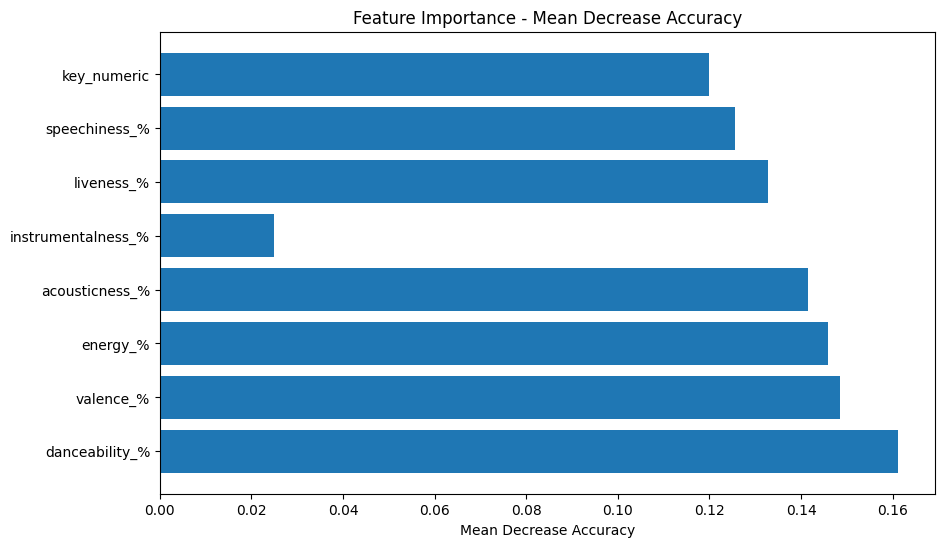

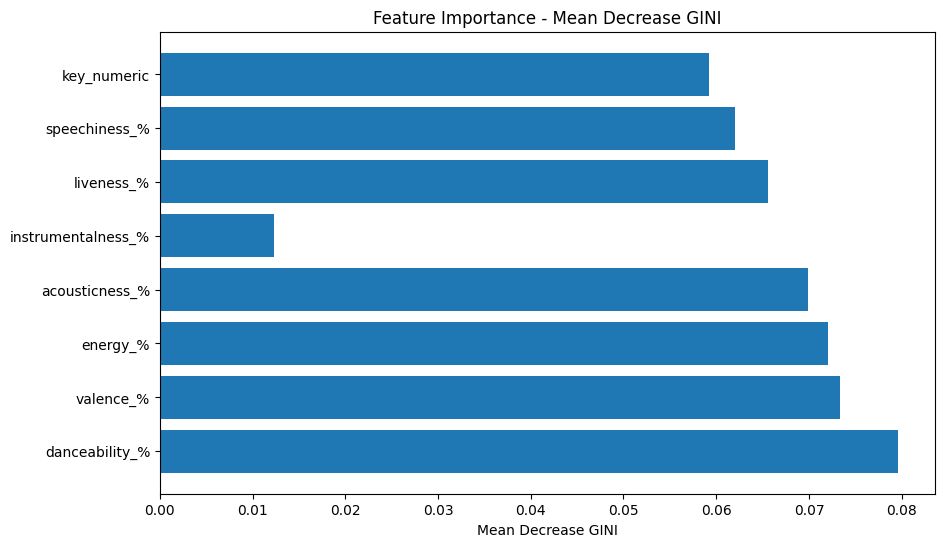

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(mean_decrease_accuracy)), mean_decrease_accuracy, align='center')
plt.yticks(range(len(mean_decrease_accuracy)), features)
plt.xlabel('Mean Decrease Accuracy')
plt.title('Feature Importance - Mean Decrease Accuracy')
plt.show()
plt.figure(figsize=(10, 6))
plt.barh(range(len(gini_importance)), gini_importance, align='center')
plt.yticks(range(len(gini_importance)), features)
plt.xlabel('Mean Decrease GINI')
plt.title('Feature Importance - Mean Decrease GINI')
plt.show()

Accuracy= 0.5548780487804879


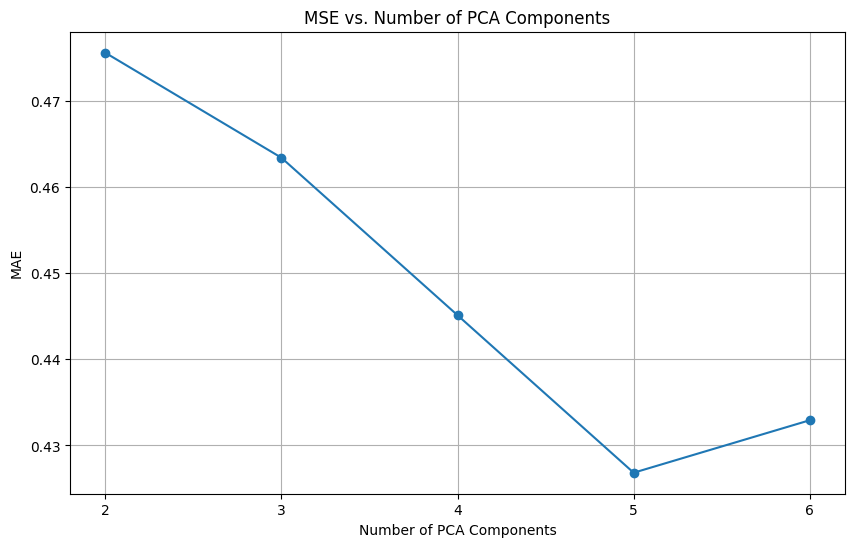

In [ ]:
from sklearn.linear_model import LogisticRegression
#X, y = load_iris(return_X_y=True)
from sklearn.metrics import accuracy_score
clf = LogisticRegression(random_state=0).fit(attr_train, target_train)
target_pred = clf.predict(attr_test)
print(f"Accuracy= {accuracy_score(target_test,target_pred)}")


n_components_range = range(2, 7)

# Initialize lists to store results
mse_scores = []
accuracy_scores=[]
# Loop through different numbers of PCA components
for n_components in n_components_range:
    # Perform PCA to reduce dimensionality
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(attr_train)
    X_test_pca = pca.transform(attr_test)

    # Initialize and fit a linear regression model to the principal components
    model = LogisticRegression()
    model.fit(X_train_pca, target_train)

    # Make predictions on the test set using the PCA-transformed features
    y_pred = model.predict(X_test_pca)
    accuracy=accuracy_score(target_test,y_pred)
    accuracy_scores.append(accuracy)
    # Calculate the Mean Squared Error (MSE) and store it
    mse = mean_absolute_error(target_test, y_pred)
    mse_scores.append(mse)

# Plot errors vs. number of PCA components
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, mse_scores, marker='o', linestyle='-')
plt.title('MSE vs. Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('MAE')
plt.grid(True)
plt.xticks(n_components_range)
plt.show()

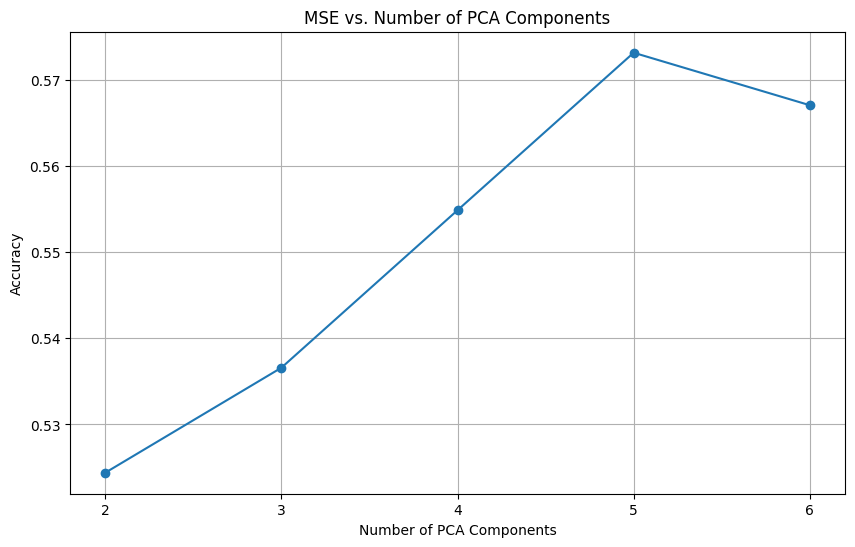

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, accuracy_scores, marker='o', linestyle='-')
plt.title('MSE vs. Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(n_components_range)
plt.show()

# Linear regression to predict number of streams

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#linear_features=['bpm','danceability_%', 'valence_%', 'energy_%', 'acousticness_%','instrumentalness_%', 'liveness_%', 'speechiness_%']
# Create a StandardScaler object
scaler  = StandardScaler()
X_lin   = spotify[features]
X_lin   = X_lin.replace(',', '', regex=True).astype(float)
X_lin   = X_lin.dropna()
X_lin   = scaler.fit_transform(X_lin)
y_lin   = spotify['streams']
attr_train, attr_test, target_train, target_test = train_test_split(X_lin, y_lin, test_size=0.2, random_state=5)

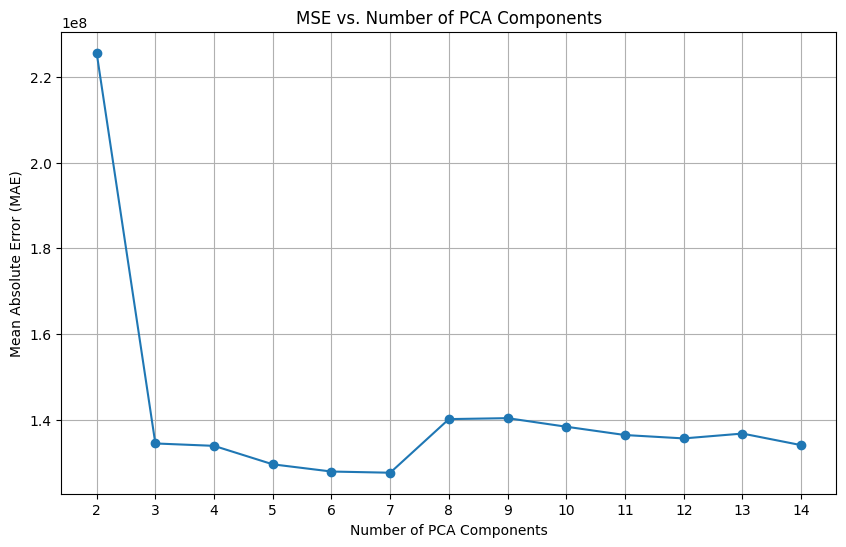

In [ ]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso

# Define a range of PCA components to test
n_components_range = range(2, 15)

# Initialize lists to store results
mse_scores = []

# Loop through different numbers of PCA components
for n_components in n_components_range:
    # Perform PCA to reduce dimensionality
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(attr_train)
    X_test_pca = pca.transform(attr_test)

    # Initialize and fit a linear regression model to the principal components
    model = Lasso(alpha=10.0)
    model.fit(X_train_pca, target_train)

    # Make predictions on the test set using the PCA-transformed features
    y_pred = model.predict(X_test_pca)

    # Calculate the Mean Squared Error (MSE) and store it
    mse = mean_absolute_error(target_test, y_pred)
    mse_scores.append(mse)

# Plot errors vs. number of PCA components
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, mse_scores, marker='o', linestyle='-')
plt.title('MSE vs. Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Mean Absolute Error (MAE)')
plt.grid(True)
plt.xticks(n_components_range)
plt.show()

In [ ]:
print("Maximum of streams:",max(spotify['streams']))
print("Minimum of streams:",min(spotify['streams']))

Maximum of streams: 3562543890
Minimum of streams: 2762


## Observation:


*   The MSE is very high which suggests that the relationship between the input variables and outputs is non-linear



In [ ]:
features=['streams','bpm','danceability_%', 'valence_%', 'energy_%', 'acousticness_%','instrumentalness_%', 'liveness_%', 'speechiness_%', 'key_numeric','mode', 'in_spotify_charts','in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists','in_deezer_charts', 'in_shazam_charts']
# Create a StandardScaler object
scaler = StandardScaler()
X_rf= spotify[features]
X_rf = X_rf.replace(',', '', regex=True).astype(float)
X_rf=X_rf.dropna()
#X_rf=scaler.fit_transform(X_rf)
y_rf = spotify['in_spotify_playlists']
attr_train, attr_test, target_train, target_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=5)

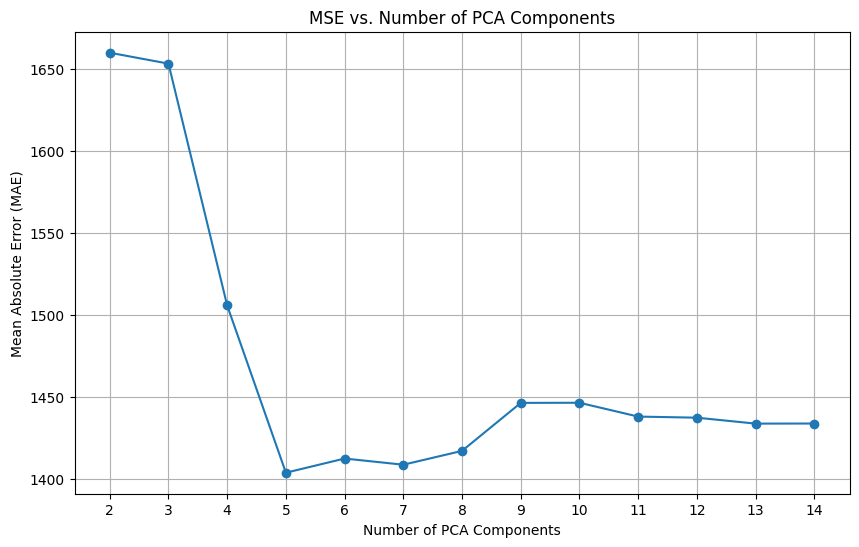

In [ ]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso

# Define a range of PCA components to test
n_components_range = range(2, 15)

# Initialize lists to store results
mse_scores = []

# Loop through different numbers of PCA components
for n_components in n_components_range:
    # Perform PCA to reduce dimensionality
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(attr_train)
    X_test_pca = pca.transform(attr_test)

    # Initialize and fit a linear regression model to the principal components
    model = Lasso(alpha=0.01)
    model.fit(X_train_pca, target_train)

    # Make predictions on the test set using the PCA-transformed features
    y_pred = model.predict(X_test_pca)

    # Calculate the Mean Squared Error (MSE) and store it
    mse = mean_absolute_error(target_test, y_pred)
    mse_scores.append(mse)

# Plot errors vs. number of PCA components
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, mse_scores, marker='o', linestyle='-')
plt.title('MSE vs. Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Mean Absolute Error (MAE)')
plt.grid(True)
plt.xticks(n_components_range)
plt.show()

In [ ]:
print("Maximum of in_spotify_playlists:",max(y_rf))
print("Minimum of in_spotify_playlists:",min(y_rf))

Maximum of in_spotify_playlists: 52898
Minimum of in_spotify_playlists: 31


In [ ]:
chart_features=['in_spotify_playlists', 'in_spotify_charts','in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists','in_deezer_charts', 'in_shazam_charts']

# Preparing the Data

In [ ]:
# Define categorical and numerical columns
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
numerical_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64'] and col not in ['streams']]

In [ ]:
# Preprocessing for numerical and categorical data
numerical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),('onehot', OneHotEncoder(handle_unknown='ignore'))])


In [ ]:
# Define the preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
transformers = [('num', numerical_transformer, numerical_cols),
                ('cat', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))
                ]), categorical_cols)])


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

In [ ]:
print('streams' in spotify.columns)

True


In [ ]:
print(y_train.head())


318     156214700
545     599770206
557     108809090
109    1163620694
77     1230675890
Name: streams, dtype: object


In [ ]:
# Convert y_train and y_test to numeric
y_train = pd.to_numeric(y_train, errors='coerce')
y_test = pd.to_numeric(y_test, errors='coerce')

# Check for any NaN values that might have been introduced
print(y_train.isna().sum())
print(y_test.isna().sum())


1
0


In [ ]:
# Drop rows where the target variable is NaN
X_train = X_train[y_train.notna()]
y_train = y_train[y_train.notna()]

X_test = X_test[y_test.notna()]
y_test = y_test[y_test.notna()]


In [ ]:
mean_value = y_train.mean()
y_train.fillna(mean_value, inplace=True)
y_test.fillna(mean_value, inplace=True)

In [ ]:
# Initialize a dictionary to store MSE values for each model
model_performance = {}

# Fit, predict, and evaluate each model
for name, model in models.items():
  pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model', model)])
  pipeline.fit(X_train, y_train)
  y_pred = pipeline.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  model_performance[name] = mse
  # Discussion of Results
  # Compare the MSE of each model
  print("\nModel Performance Comparison:")
  print(f'{name} MSE: {mse}')


Model Performance Comparison:
Linear Regression MSE: 8.091967750227555e+16

Model Performance Comparison:
Random Forest MSE: 5.147733196009097e+16

Model Performance Comparison:
Gradient Boosting MSE: 5.577691880494799e+16


# Conclusion
The best performing model was Random Forest for classifying the amount of times a song would be streamed and the number of playlists a song would appear in.